## Training loops

As we said earlier the output can be transformed tailored for a specific task. 

### One to One 


Recurrent Neural Networks (RNNs) in one-to-one mode are used for applications where the input and the output are fixed-sized. This mode is a basic form, similar to traditional neural network models, but with the added advantage of internal memory in RNNs, which helps in processing sequences of data. The three most common uses of RNNs in one-to-one mode include:

Traditional Classification Tasks: RNNs in one-to-one mode are used for classification tasks where the input is a fixed-size vector, and the output is a class label. This is common in applications like image classification, where an image (processed into a fixed-size vector) is classified into categories like animals, objects, or scenes.

Regression Tasks: Similar to classification, RNNs in one-to-one mode are also employed for regression tasks where the goal is to predict a continuous value. For example, in stock price prediction, the input might be the historical price data of a fixed period, and the output would be the predicted future price.

Data Filtering or Cleaning: RNNs can be used to filter or clean data. In this scenario, the network takes a fixed-size input, like a signal or an image with noise, and outputs a cleaned or enhanced version of the input. This is particularly useful in applications like noise reduction in audio signals or removing artifacts from images.

These applications leverage the sequential processing capability of RNNs but in a constrained manner where the sequence length is one, essentially making them function like a standard feedforward neural network with the added benefit of internal state representation.

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
import numpy as np

Files already downloaded and verified
torch.Size([32, 3, 32, 32])
torch.Size([32])


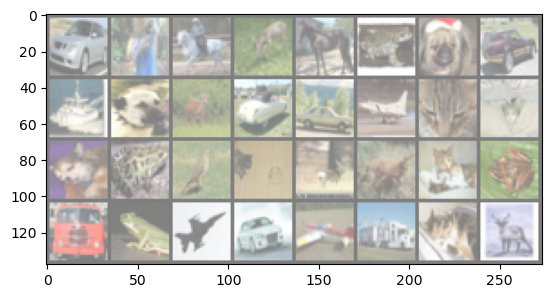

In [4]:

# Load the dataset
batch_size = 32
train_dataset = datasets.CIFAR10(root='./data', train=True, transform=transforms.ToTensor(), download=True)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5 # unnormalize
    npimg = img.numpy() # convert from tensor
    plt.imshow(np.transpose(npimg, (1, 2, 0))) # transpose to show image

# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))

# print size of images and labels
print(images.shape)
print(labels.shape)

In [5]:
# define RNN model for image classification
class ImageRNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(ImageRNN, self).__init__()
        # rnn model parameters
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.num_classes = num_classes

        # rnn cell from pytorch (dropout=0, bidirectional=False)
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True, bidirectional=False, dropout=0.0)

        # fully connected layer, output = num_classes
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        # Size of x is (batch_size, channels, height, width)
        # Convert image to a input of sequence 1: (batch_size, 1, height * width * channels)
        x = x.view(x.size(0), 1, -1)

        # initialize hidden state with zeros
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)

        # forward propagate rnn
        out, _ = self.rnn(x, h0)

        # decode hidden state one to one
        out = self.fc(out.squeeze(1))
        
        return out

In [14]:
# model parameters
input_size = 32*32*3 # 32x32 image with 3 channels
hidden_size = 128   # number of hidden units
num_layers = 1   # number of layers
num_classes = 10    # number of output classes

# training parameters
learning_rate = 0.0001
num_epochs = 50

# Initialize the model
model = ImageRNN(input_size, hidden_size, num_layers, num_classes)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Lists for storing metrics
epoch_losses = []
epoch_accuracies = []

# Train model
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    epoch_loss = 0.0
    correct_predictions = 0
    total_predictions = 0

    for i, (images, labels) in enumerate(train_loader):
        model.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        # Loss accumulation
        epoch_loss += loss.item()

        # Accuracy calculation
        _, predicted = torch.max(outputs.data, 1)
        total_predictions += labels.size(0)
        correct_predictions += (predicted == labels).sum().item()

    # Average loss and accuracy for the epoch
    avg_epoch_loss = epoch_loss / n_total_steps
    epoch_accuracy = 100 * correct_predictions / total_predictions

    # Append to the lists
    epoch_losses.append(avg_epoch_loss)
    epoch_accuracies.append(epoch_accuracy)

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%')

Epoch [1/50], Loss: 1.9121, Accuracy: 32.72%
Epoch [2/50], Loss: 1.7509, Accuracy: 38.53%
Epoch [3/50], Loss: 1.6849, Accuracy: 41.13%
Epoch [4/50], Loss: 1.6365, Accuracy: 42.79%
Epoch [5/50], Loss: 1.5987, Accuracy: 44.11%
Epoch [6/50], Loss: 1.5666, Accuracy: 45.18%
Epoch [7/50], Loss: 1.5399, Accuracy: 46.02%
Epoch [8/50], Loss: 1.5150, Accuracy: 47.15%
Epoch [9/50], Loss: 1.4934, Accuracy: 47.72%
Epoch [10/50], Loss: 1.4730, Accuracy: 48.37%
Epoch [11/50], Loss: 1.4557, Accuracy: 49.03%
Epoch [12/50], Loss: 1.4392, Accuracy: 49.81%
Epoch [13/50], Loss: 1.4225, Accuracy: 50.43%
Epoch [14/50], Loss: 1.4059, Accuracy: 51.08%
Epoch [15/50], Loss: 1.3921, Accuracy: 51.52%
Epoch [16/50], Loss: 1.3794, Accuracy: 51.88%
Epoch [17/50], Loss: 1.3649, Accuracy: 52.42%
Epoch [18/50], Loss: 1.3528, Accuracy: 52.67%
Epoch [19/50], Loss: 1.3408, Accuracy: 53.33%
Epoch [20/50], Loss: 1.3289, Accuracy: 53.74%
Epoch [21/50], Loss: 1.3180, Accuracy: 53.86%
Epoch [22/50], Loss: 1.3078, Accuracy: 54.1

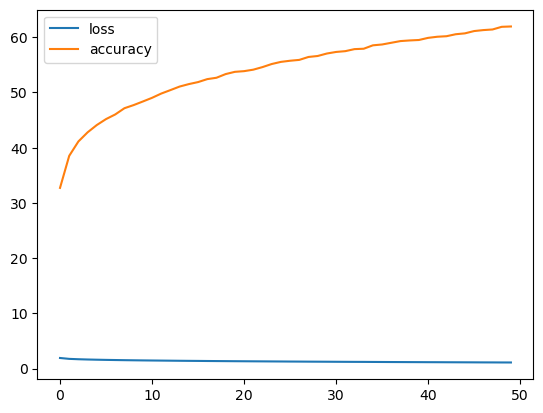

In [15]:
# plot loss and accuracy
plt.plot(epoch_losses, label='loss')
plt.plot(epoch_accuracies, label='accuracy')
plt.legend()
plt.show()

### Many To One

many-to-one RNNs take a sequence of inputs and produce a single output. The network processes the sequence, accumulating information, and culminates in a final representation that leads to a single output point.

This architecture is prominent in sentiment analysis where a sequence of words (a sentence or a document) is classified into a sentiment category, or in spam detection where a sequence of email text is classified as spam or not spam.

In [1]:
from io import open
import glob
import os
import unicodedata
import string

import torch
import torch.nn as nn
from torch.utils.data import Dataset, random_split, DataLoader
from random import choices
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence


In [26]:
# prepare data

all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)

def findFiles(path): 
    return glob.glob(path)


def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s) 
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )


def readLines(filename):
    lines = open(filename, encoding='utf-8').read().strip().split('\n')
    return [unicodeToAscii(line) for line in lines]


category_lines = {}
all_categories = []
root_path = '/'.join(os.getcwd().split('/')[:-1])
for filename in findFiles(root_path+'/PyTorch_Exos/data/names/*.txt'):
    category = os.path.splitext(os.path.basename(filename))[0]
    all_categories.append(category)
    lines = readLines(filename)
    category_lines[category] = lines

n_categories = len(all_categories)


# convert data to tensors
def nameToTensor(name, max_length):
    tensor = torch.zeros(max_length, n_letters)
    name = name[:max_length]
    for i, letter in enumerate(name):
        tensor[i][all_letters.find(letter)] = 1
    return tensor


def nameToIndexTensor(name, max_length):
    tensor = torch.zeros(max_length, dtype=torch.long)
    name = name[:max_length]
    for i, letter in enumerate(name):
        tensor[i] = all_letters.find(letter)
    return tensor


def categoryToTensor(category):
    return torch.tensor([all_categories.index(category)], dtype=torch.long)
    

In [27]:
# create dataset class 


class NamesDataset(Dataset):
    def __init__(self, category_lines, all_categories, nb_sample, max_length):
        self.category_lines = category_lines
        self.all_categories = all_categories
        self.nb_sample = nb_sample
        self.max_length = max_length
        self.data = []

        for category, lines in self.category_lines.items():
            for line in choices(lines, k=self.nb_sample):
                self.data.append((line, category))

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        line, category = self.data[idx]
        line_tensor = nameToTensor(line, self.max_length)
        line_index_tensor = nameToIndexTensor(line, self.max_length)
        line_length = len(line)
        category_tensor = categoryToTensor(category)
        return line_tensor, line_index_tensor, line_length ,category_tensor


In [28]:
# split dataset into train and test
max_length = max(len(line) for lines in category_lines.values() for line in lines)
balancing = 1000
dataset = NamesDataset(category_lines, all_categories, balancing, max_length)

train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size

train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

In [29]:
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

In [75]:
# define RNN model for name classification
class NameRNN(nn.Module):
    def __init__(self, input_size, embed_size, hidden_size, output_size):
        super(NameRNN, self).__init__()
        self.input_size = input_size
        self.embed_size = embed_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # embedding layer
        self.embedding = nn.Embedding(input_size, embed_size)

        # rnn cell from pytorch (dropout=0, bidirectional=False)
        self.rnn = nn.RNN(embed_size, hidden_size, batch_first=True, num_layers=2, dropout=0.3)

        # fully connected layer, output = num_classes
        self.fc = nn.Linear(hidden_size, output_size)

        # softmax layer
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, x, indx):

        # embedding
        x = self.embedding(x)

        # pack padded sequence
        x = pack_padded_sequence(x, indx, batch_first=True, enforce_sorted=False)

        # initialize hidden state with zeros
        h0 = torch.zeros(2, x.data.size(0), self.hidden_size)

        # forward propagate rnn
        out, _ = self.rnn(x, h0)

        # unpack padded sequence
        output, _ = pad_packed_sequence(out, batch_first=True)

        # decode hidden state of last time step
        out = torch.zeros(output.shape[0], self.output_size)
        for i in range(output.shape[0]):
            o = output[i, :indx[i], :]
            o = o[-1, :]
            o = self.fc(o)
            out[i] = o

        # softmax
        out = self.softmax(out)
        
        return out

In [76]:
# model parameters
input_size = n_letters # number of input features
embed_size = 26        # number of embedding features
hidden_size = 128   # number of hidden units
output_size = n_categories    # number of output classes

In [77]:
# training parameters
learning_rate = 0.0001
num_epochs = 50

# Initialize the model
model = NameRNN(input_size, embed_size, hidden_size, output_size)

# Loss and optimizer
criterion = nn.NLLLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Lists for storing metrics
epoch_losses = []
epoch_accuracies = []

# Train model
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    epoch_loss = 0.0
    correct_predictions = 0
    total_predictions = 0

    for i, (names, indexes, len_lines, categories) in enumerate(train_loader):
        model.zero_grad()

        # Forward pass
        outputs = model(indexes, len_lines)
        loss = criterion(outputs, categories.squeeze(1))

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        # Loss accumulation
        epoch_loss += loss.item()

        # Accuracy calculation
        _, predicted = torch.max(outputs.data, 1)
        total_predictions += categories.size(0)
        correct_predictions += (predicted == categories.squeeze(1)).sum().item()

    # Average loss and accuracy for the epoch
    avg_epoch_loss = epoch_loss / n_total_steps
    epoch_accuracy = 100 * correct_predictions / total_predictions

    # Append to the lists
    epoch_losses.append(avg_epoch_loss)
    epoch_accuracies.append(epoch_accuracy)

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%') 

Epoch [1/50], Loss: 2.5651, Accuracy: 25.85%
Epoch [2/50], Loss: 2.0252, Accuracy: 39.19%
Epoch [3/50], Loss: 1.8001, Accuracy: 44.00%
Epoch [4/50], Loss: 1.6675, Accuracy: 47.82%
Epoch [5/50], Loss: 1.5764, Accuracy: 50.03%
Epoch [6/50], Loss: 1.5038, Accuracy: 52.49%
Epoch [7/50], Loss: 1.4384, Accuracy: 54.04%
Epoch [8/50], Loss: 1.3759, Accuracy: 56.10%
Epoch [9/50], Loss: 1.3277, Accuracy: 57.51%
Epoch [10/50], Loss: 1.2843, Accuracy: 59.14%
Epoch [11/50], Loss: 1.2403, Accuracy: 60.29%
Epoch [12/50], Loss: 1.2012, Accuracy: 61.67%
Epoch [13/50], Loss: 1.1620, Accuracy: 63.08%
Epoch [14/50], Loss: 1.1304, Accuracy: 64.05%
Epoch [15/50], Loss: 1.1019, Accuracy: 64.93%
Epoch [16/50], Loss: 1.0684, Accuracy: 66.16%
Epoch [17/50], Loss: 1.0422, Accuracy: 66.89%
Epoch [18/50], Loss: 1.0122, Accuracy: 67.78%
Epoch [19/50], Loss: 0.9857, Accuracy: 68.68%
Epoch [20/50], Loss: 0.9556, Accuracy: 69.67%
Epoch [21/50], Loss: 0.9311, Accuracy: 70.81%
Epoch [22/50], Loss: 0.9114, Accuracy: 71.4

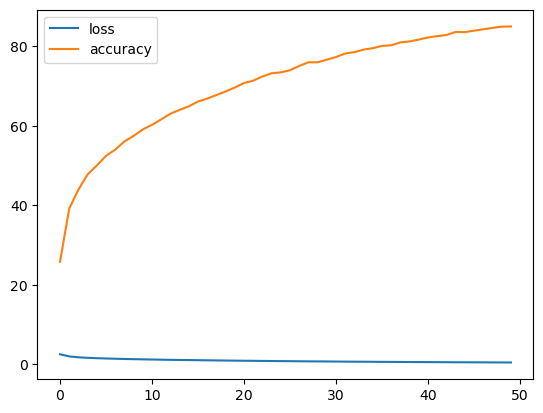

In [79]:
# plot loss and accuracy
plt.plot(epoch_losses, label='loss')
plt.plot(epoch_accuracies, label='accuracy')
plt.legend()
plt.show()

# Music Generation

## Packages

In [ ]:
# Importing Packages for music generation
import numpy as np 
import pandas as pd 
from collections import Counter
import random
import IPython
from IPython.display import Image, Audio
import music21
from music21 import *
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
import os
import sys
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")
np.random.seed(42)

## Data Ingestion

In [ ]:
def extract_notes(midi):
    notes = []
    pick = None
    songs = instrument.partitionByInstrument(midi)
    for part in songs.parts:
        pick = part.recurse()
        for element in pick:
            if isinstance(element, note.Note):
                notes.append(str(element.pitch))
            elif isinstance(element, chord.Chord):
                notes.append(".".join(str(n) for n in element.normalOrder))
    return ' - '.join(notes)

In [ ]:
import os

folder_path = 'data/music_classic'
artist_midi_dict = {}
cnt = 0
for artist_folder in os.listdir(folder_path):
    print(artist_folder)
    

    filepath = folder_path + '/' + artist_folder+'/'

    midis = []
    for i in os.listdir(filepath):
        if i.endswith('.mid'):
            tr = filepath + i
            try:
                midi = music21.converter.parse(tr)
                midis.append(extract_notes(midi))
            except:
                continue
            

    artist_midi_dict[artist_folder] = midis
    
    cnt += 1
    if cnt == 5:
        break
    


mendelssohn
haydn
grieg
debussy
bach


In [ ]:
df = pd.DataFrame(columns=['artist', 'midi'])
for artist in artist_midi_dict.keys():
    for midi in artist_midi_dict[artist]:
        df = df.append({'artist':artist, 'midi':midi}, ignore_index=True)

## One to One

Predict the next note

https://www.kaggle.com/code/karnikakapoor/music-generation-lstm/notebook

In [70]:
df.artist.value_counts()

haydn          21
grieg          16
mendelssohn    14
debussy         7
bach            3
Name: artist, dtype: int64

In [71]:
data = df[df.artist=='haydn']

In [76]:
corpus = ' - '.join(data.midi.values.tolist()).split(' - ')

In [78]:
len(corpus)

25874

In [79]:
count_num = Counter(corpus)

In [80]:
#Exploring the notes dictionary
Notes = list(count_num.keys())
Recurrence = list(count_num.values())
#Average recurrenc for a note in Corpus
def Average(lst):
    return sum(lst) / len(lst)
print("Average recurrenc for a note in Corpus:", Average(Recurrence))
print("Most frequent note in Corpus appeared:", max(Recurrence), "times")
print("Least frequent note in Corpus appeared:", min(Recurrence), "time")

Average recurrenc for a note in Corpus: 144.54748603351956
Most frequent note in Corpus appeared: 1449 times
Least frequent note in Corpus appeared: 1 time


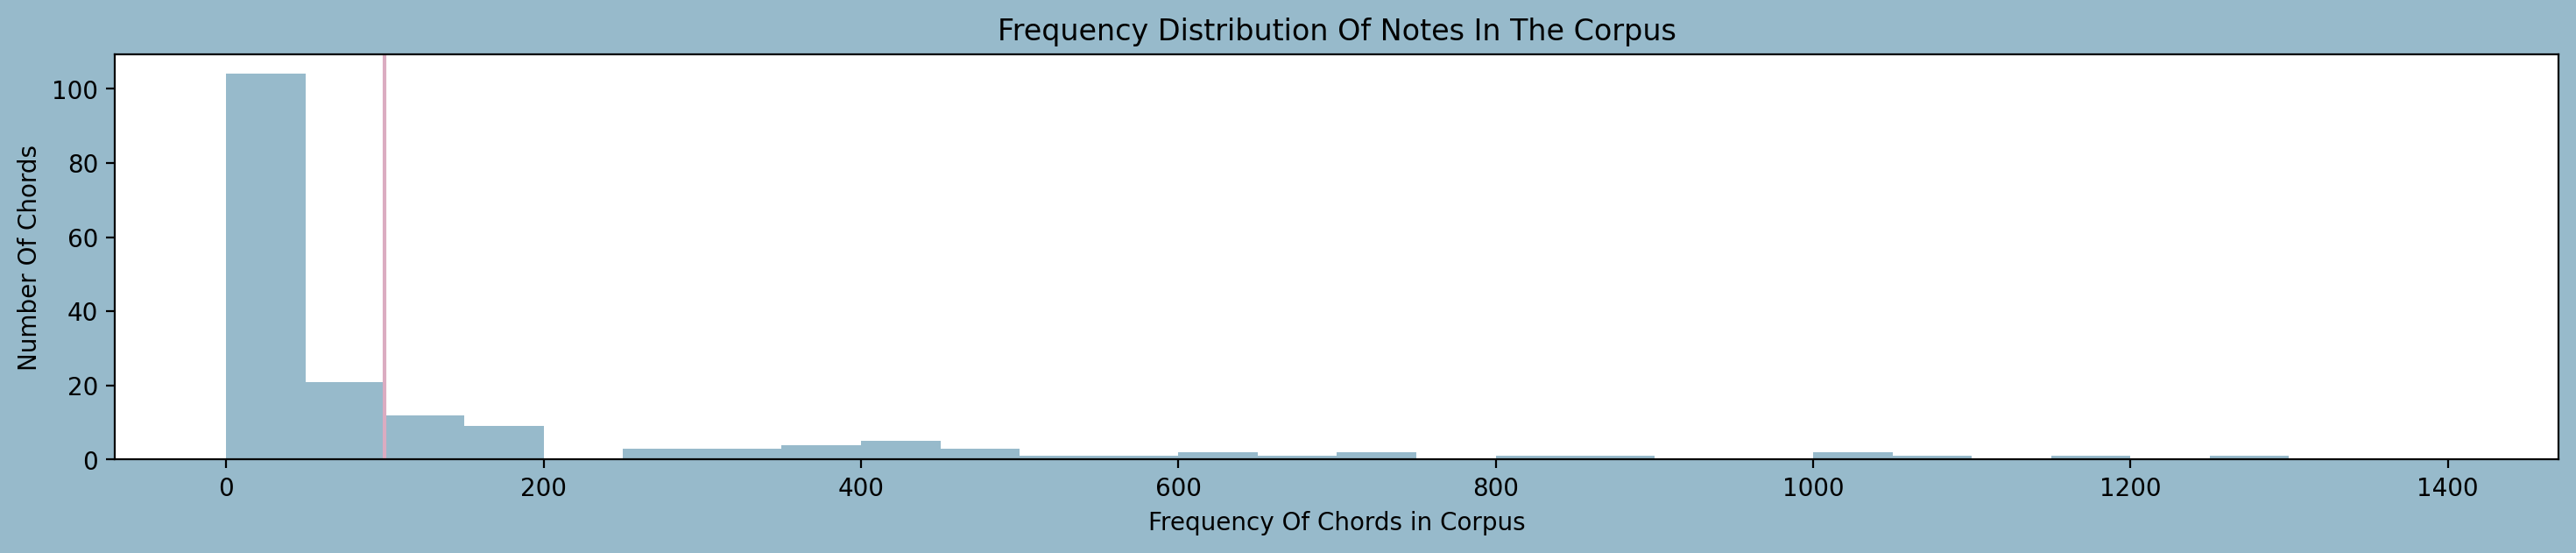

In [81]:
# Plotting the distribution of Notes
plt.figure(figsize=(18,3),facecolor="#97BACB")
bins = np.arange(0,(max(Recurrence)), 50) 
plt.hist(Recurrence, bins=bins, color="#97BACB")
plt.axvline(x=100,color="#DBACC1")
plt.title("Frequency Distribution Of Notes In The Corpus")
plt.xlabel("Frequency Of Chords in Corpus")
plt.ylabel("Number Of Chords")
plt.show()

In [82]:
#Getting a list of rare chords
rare_note = []
for index, (key, value) in enumerate(count_num.items()):
    if value < 100:
        m =  key
        rare_note.append(m)
        
print("Total number of notes that occur less than 100 times:", len(rare_note))

Total number of notes that occur less than 100 times: 125


In [83]:
#Eleminating the rare notes
for element in corpus:
    if element in rare_note:
        corpus.remove(element)

print("Length of Corpus after elemination the rare notes:", len(corpus))

Length of Corpus after elemination the rare notes: 23531


In [88]:
len(set(corpus))

132

In [158]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, random_split, DataLoader

from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(np.array(corpus).reshape(-1, 1))


def note_to_one_hot_tensor(note):
    note = np.array(note).reshape(-1, 1)
    note = enc.transform(note).toarray()
    return torch.Tensor(note)

In [159]:
note_to_one_hot_tensor('C4').shape

torch.Size([1, 132])

In [160]:
# create dataset class for predicting next note
class MusicDataset(Dataset):
    def __init__(self, corpus, enc):
        self.corpus = corpus
        self.enc = enc

    def __len__(self):
        return len(self.corpus) - 1

    def __getitem__(self, idx):
        input_note = self.corpus[idx]
        target_note = self.corpus[idx+1]
        input_note = note_to_one_hot_tensor(input_note)
        target_note = note_to_one_hot_tensor(target_note)
        return input_note, target_note

In [161]:
dataset = MusicDataset(corpus, enc)

train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size

train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

In [162]:
batch_size = 4
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

In [163]:
# define RNN model for predict next note
class MusicRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers):
        super(MusicRNN, self).__init__()
        # rnn model parameters
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.num_layers = num_layers

        # rnn cell from pytorch (dropout=0, bidirectional=False)
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True, bidirectional=False, dropout=0.0)

        # fully connected layer, output = num_classes
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # initialize hidden state with zeros
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)

        # forward propagate rnn
        out, _ = self.rnn(x, h0)

        # decode hidden state one to one
        out = self.fc(out.squeeze(1))
        
        return out

In [164]:
input_size = enc.categories_[0].shape[0] # number of input features
hidden_size = 128   # number of hidden units
output_size = enc.categories_[0].shape[0]    # number of output classes
num_layers = 1   # number of layers


In [181]:
dataset[0][0].shape

torch.Size([1, 132])

In [182]:
model = MusicRNN(input_size, hidden_size, output_size, num_layers)

o = model(dataset[0][0].unsqueeze(0))

In [184]:
dataset[0][1].squeeze(0).shape, o.shape

(torch.Size([132]), torch.Size([1, 132]))

In [150]:
criterion(o, dataset[0][1].squeeze(0))

tensor(5.0226, grad_fn=<DivBackward1>)

In [165]:

# training parameters
learning_rate = 0.0001
num_epochs = 50

# Initialize the model
model = MusicRNN(input_size, hidden_size, output_size, num_layers)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Lists for storing metrics
epoch_losses = []
epoch_accuracies = []


In [187]:

# Train model
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    epoch_loss = 0.0
    correct_predictions = 0
    total_predictions = 0

    for i, (input_notes, target_notes) in enumerate(train_loader):
        model.zero_grad()

        # Forward pass
        outputs = model(input_notes)
        loss = criterion(outputs, target_notes.squeeze(1))

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        # Loss accumulation
        epoch_loss += loss.item()

        # Accuracy calculation
        _, predicted = torch.max(outputs.data, 1)
        total_predictions += target_notes.size(0)
        correct_predictions += (predicted == torch.max(target_notes, -1)[1]).sum().item()

    # Average loss and accuracy for the epoch
    avg_epoch_loss = epoch_loss / n_total_steps
    epoch_accuracy = 100 * correct_predictions / total_predictions

    # Append to the lists
    epoch_losses.append(avg_epoch_loss)
    epoch_accuracies.append(epoch_accuracy)

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%')

Epoch [1/50], Loss: 4.8827, Accuracy: 3.51%
Epoch [2/50], Loss: 4.8827, Accuracy: 3.62%
Epoch [3/50], Loss: 4.8827, Accuracy: 3.48%


KeyboardInterrupt: 

In [186]:
predicted

tensor([110,  63,  16,  72])

In [177]:
torch.max(target_notes, -1)[1]

tensor([[113],
        [102],
        [ 64],
        [ 84]])

In [ ]:
# plot loss and accuracy
plt.plot(epoch_losses, label='loss')
plt.plot(epoch_accuracies, label='accuracy')
plt.legend()
plt.show()

In [148]:
Corpus = corpus.copy()
# Storing all the unique characters present in my corpus to bult a mapping dic. 
symb = sorted(list(set(Corpus)))

L_corpus = len(Corpus) #length of corpus
L_symb = len(symb) #length of total unique characters

#Building dictionary to access the vocabulary from indices and vice versa
mapping = dict((c, i) for i, c in enumerate(symb))
reverse_mapping = dict((i, c) for i, c in enumerate(symb))

print("Total number of characters:", L_corpus)
print("Number of unique characters:", L_symb)


#Splitting the Corpus in equal length of strings and output target
length = 40
features = []
targets = []
for i in range(0, L_corpus - length, 1):
    feature = Corpus[i:i + length]
    target = Corpus[i + length]
    features.append([mapping[j] for j in feature])
    targets.append(mapping[target])
    
    
L_datapoints = len(targets)
print("Total number of sequences in the Corpus:", L_datapoints)


# reshape X and normalize
X = (np.reshape(features, (L_datapoints, length, 1)))/ float(L_symb)
# one hot encode the output variable
y = tensorflow.keras.utils.to_categorical(targets) 

Total number of characters: 23531
Number of unique characters: 132


Total number of sequences in the Corpus: 23491


NameError: name 'tensorflow' is not defined

In [149]:
X

array([[[0.84090909],
        [0.84090909],
        [0.84090909],
        ...,
        [0.92424242],
        [0.71969697],
        [0.65909091]],

       [[0.84090909],
        [0.84090909],
        [0.96212121],
        ...,
        [0.71969697],
        [0.65909091],
        [0.46969697]],

       [[0.84090909],
        [0.96212121],
        [0.96212121],
        ...,
        [0.65909091],
        [0.46969697],
        [0.83333333]],

       ...,

       [[0.09848485],
        [0.78787879],
        [0.79545455],
        ...,
        [0.20454545],
        [0.50757576],
        [0.43939394]],

       [[0.78787879],
        [0.79545455],
        [0.71969697],
        ...,
        [0.50757576],
        [0.43939394],
        [0.85606061]],

       [[0.79545455],
        [0.71969697],
        [0.79545455],
        ...,
        [0.43939394],
        [0.85606061],
        [0.62121212]]])